## Evaluacion Modulo 3

##  Importacion de librerias

In [2]:
# librerias para analizar y explorar datos

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)


In [3]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

In [5]:
# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

## Fase 1: Exploración y Limpieza:

## 1-Exploración Inicial:

-Realiza una exploración inicial de los datos para identificar posibles problemas, como valores
nulos, atípicos o datos faltantes en las columnas relevantes.

-Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la
presencia de valores nulos y estadísticas básicas de las columnas involucradas.

-Une los dos conjuntos de datos de la forma más eficiente.

## A-Realiza una exploración inicial de los datos de los dos DF:

In [65]:
df_CFA = pd.read_csv('Customer-Flight-Activity.csv',index_col = 0, sep=',')
df_CFA

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
999902,2018,12,0,0,0,0,0.0,0,0
999911,2018,12,0,0,0,0,0.0,0,0
999940,2018,12,3,0,3,1233,123.0,0,0


In [66]:
df_CLH = pd.read_csv('Customer-Loyalty-History.csv', index_col=0, sep=',')
df_CLH

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN


-Elementos basicos para un analisis de DF:



In [ ]:

 # Exploración de los datos:

 # df.head() # ver las primeras filas del DataFrame
 # df.tail() # ver las últimas filas del DataFrame
 #  # df.info() # información general del DataFrame # ver las primeras filas del DataFrame
 # df.describe() # estadísticas descriptivas de las columnas numéricas
 # df.shape() # dimensiones del DataFrame
 # df.columns # nombres de las columnas del DataFrame
 # df.dtypes # tipos de datos de las columnas del DataFrame
 # df.isnull().sum() # contar valores nulos en cada columna
 # df.nunique() # contar valores únicos en cada columna
 # df['column_name'].value_counts() # contar ocurrencias de cada valor en una columna específica

In [67]:
df_CFA.head() # ver las primeras filas del DataFrame


,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


In [68]:
df_CLH.head() 

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [69]:
df_CFA.tail() # Muestra las últimas 5 filas del DataFrame

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
999902,2018,12,0,0,0,0,0.0,0,0
999911,2018,12,0,0,0,0,0.0,0,0
999940,2018,12,3,0,3,1233,123.0,0,0
999982,2018,12,0,0,0,0,0.0,0,0
999986,2018,12,0,0,0,0,0.0,0,0


In [70]:
df_CLH.tail()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [71]:
df_CFA.info() # Muestra información del DataFrame como el número de filas, columnas y tipos de datos.

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 100018 to 999986
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 30.9 MB


In [72]:
df_CLH.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16737 entries, 480934 to 652627
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16737 non-null  object 
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non-null   float64
 14  Cancellation Month  2067 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 2.0

In [73]:
df_CFA.shape # Devuelve una tupla con el número de filas y columnas del DataFrame

print(f"El número de filas que tenemos es {df_CFA.shape[0]}, y el número de columnas es {df_CFA.shape[1]}")

El número de filas que tenemos es 405624, y el número de columnas es 9


In [74]:
df_CLH.shape

print(f"El número de filas que tenemos es {df_CLH.shape[0]}, y el número de columnas es {df_CLH.shape[1]}")

El número de filas que tenemos es 16737, y el número de columnas es 15


In [75]:
df_CFA.columns # Devuelve un índice con los nombres de las columnas del DataFrame

Index(['Year', 'Month', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [76]:
df_CLH.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [77]:
df_CFA.describe() # Genera estadísticas descriptivas

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [78]:
df_CLH.describe()

,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [79]:
df_CFA.describe().T # Transpone el resultado de `describe()` para una mejor visualización.

,count,mean,std,min,25%,50%,75%,max
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [80]:
df_CLH.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [81]:
df_CFA.dtypes  # Devuelve los tipos de datos de cada columna del DataFrame.

Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

In [82]:
df_CFA["Points Accumulated"] = df_CFA["Points Accumulated"].astype("int") # Cambia el tipo de dato de una columna específica 


In [83]:
df_CFA["Month"] = df_CFA["Month"].astype("object")

In [84]:
df_CFA.dtypes  

Year                            int64
Month                          object
Flights Booked                  int64
Flights with Companions         int64
Total Flights                   int64
Distance                        int64
Points Accumulated              int64
Points Redeemed                 int64
Dollar Cost Points Redeemed     int64
dtype: object

In [85]:
df_CLH.dtypes  

Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object

## B: Realiza una exploración de los datos para identificar posibles problemas: como valores nulos, atípicos o datos faltantes en las columnas relevantes.

## I: -Homogeneizamos nombre de las columnas de ambos DF

In [86]:
nuevas_columnas = {}

for col in df_CFA.columns:
    nuevas_columnas[col] = col.replace(" ", "")

nuevas_columnas

{'Year': 'Year',
 'Month': 'Month',
 'Flights Booked': 'FlightsBooked',
 'Flights with Companions': 'FlightswithCompanions',
 'Total Flights': 'TotalFlights',
 'Distance': 'Distance',
 'Points Accumulated': 'PointsAccumulated',
 'Points Redeemed': 'PointsRedeemed',
 'Dollar Cost Points Redeemed': 'DollarCostPointsRedeemed'}

In [87]:
df_CFA.rename(columns = nuevas_columnas, inplace = True)
df_CFA.columns

Index(['Year', 'Month', 'FlightsBooked', 'FlightswithCompanions',
       'TotalFlights', 'Distance', 'PointsAccumulated', 'PointsRedeemed',
       'DollarCostPointsRedeemed'],
      dtype='object')

In [88]:
df_CFA.describe()

,Year,FlightsBooked,FlightswithCompanions,TotalFlights,Distance,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,2017.500000,4.115052,1.031805,5.146858,1208.880059,123.667002,30.696872,2.484503
std,0.500001,5.225518,2.076869,6.521227,1433.155320,146.579083,125.486049,10.150038
min,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,2018.000000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,2018.000000,21.000000,11.000000,32.000000,6293.000000,676.000000,876.000000,71.000000


In [89]:
nuevas_columnas2 = {}

for col in df_CLH.columns:
    nuevas_columnas2[col] = col.replace(" ", "")

nuevas_columnas2

{'Country': 'Country',
 'Province': 'Province',
 'City': 'City',
 'Postal Code': 'PostalCode',
 'Gender': 'Gender',
 'Education': 'Education',
 'Salary': 'Salary',
 'Marital Status': 'MaritalStatus',
 'Loyalty Card': 'LoyaltyCard',
 'CLV': 'CLV',
 'Enrollment Type': 'EnrollmentType',
 'Enrollment Year': 'EnrollmentYear',
 'Enrollment Month': 'EnrollmentMonth',
 'Cancellation Year': 'CancellationYear',
 'Cancellation Month': 'CancellationMonth'}

In [90]:
df_CLH.rename(columns = nuevas_columnas2, inplace = True)
df_CLH.columns

Index(['Country', 'Province', 'City', 'PostalCode', 'Gender', 'Education',
       'Salary', 'MaritalStatus', 'LoyaltyCard', 'CLV', 'EnrollmentType',
       'EnrollmentYear', 'EnrollmentMonth', 'CancellationYear',
       'CancellationMonth'],
      dtype='object')

In [91]:
df_CFA.describe()

,Year,FlightsBooked,FlightswithCompanions,TotalFlights,Distance,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,2017.500000,4.115052,1.031805,5.146858,1208.880059,123.667002,30.696872,2.484503
std,0.500001,5.225518,2.076869,6.521227,1433.155320,146.579083,125.486049,10.150038
min,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,2018.000000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,2018.000000,21.000000,11.000000,32.000000,6293.000000,676.000000,876.000000,71.000000


## II:Valores NULOS en ambos DF:

In [92]:
df_CFA.isnull()

,Year,Month,FlightsBooked,FlightswithCompanions,TotalFlights,Distance,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
Loyalty Number,,,,,,,,,
100018,False,False,False,False,False,False,False,False,False
100102,False,False,False,False,False,False,False,False,False
100140,False,False,False,False,False,False,False,False,False
100214,False,False,False,False,False,False,False,False,False
100272,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
999902,False,False,False,False,False,False,False,False,False
999911,False,False,False,False,False,False,False,False,False
999940,False,False,False,False,False,False,False,False,False


In [93]:
df_CLH.isnull()

,Country,Province,City,PostalCode,Gender,Education,Salary,MaritalStatus,LoyaltyCard,CLV,EnrollmentType,EnrollmentYear,EnrollmentMonth,CancellationYear,CancellationMonth
Loyalty Number,,,,,,,,,,,,,,,
480934,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
549612,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True
429460,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
608370,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True
530508,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823768,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True
680886,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
776187,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True


In [94]:
df_CFA.isnull().sum()

Year                        0
Month                       0
FlightsBooked               0
FlightswithCompanions       0
TotalFlights                0
Distance                    0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

In [95]:
df_CFA.notnull().sum()

Year                        405624
Month                       405624
FlightsBooked               405624
FlightswithCompanions       405624
TotalFlights                405624
Distance                    405624
PointsAccumulated           405624
PointsRedeemed              405624
DollarCostPointsRedeemed    405624
dtype: int64

In [96]:
df_CLH.isnull().sum()

Country                  0
Province                 0
City                     0
PostalCode               0
Gender                   0
Education                0
Salary                4238
MaritalStatus            0
LoyaltyCard              0
CLV                      0
EnrollmentType           0
EnrollmentYear           0
EnrollmentMonth          0
CancellationYear     14670
CancellationMonth    14670
dtype: int64

In [97]:
df_CLH['CancellationYear'].isnull().sum()   

14670

In [98]:
df_CLH['CancellationMonth'].isnull().sum()

14670

In [99]:
df_CLH.notnull().sum()

Country              16737
Province             16737
City                 16737
PostalCode           16737
Gender               16737
Education            16737
Salary               12499
MaritalStatus        16737
LoyaltyCard          16737
CLV                  16737
EnrollmentType       16737
EnrollmentYear       16737
EnrollmentMonth      16737
CancellationYear      2067
CancellationMonth     2067
dtype: int64

## III: Valores DUPLICADOS en ambos DF:

In [100]:
df_CFA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 100018 to 999986
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Year                      405624 non-null  int64 
 1   Month                     405624 non-null  object
 2   FlightsBooked             405624 non-null  int64 
 3   FlightswithCompanions     405624 non-null  int64 
 4   TotalFlights              405624 non-null  int64 
 5   Distance                  405624 non-null  int64 
 6   PointsAccumulated         405624 non-null  int64 
 7   PointsRedeemed            405624 non-null  int64 
 8   DollarCostPointsRedeemed  405624 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 30.9+ MB


In [101]:
df_CFA.duplicated()

Loyalty Number
100018    False
100102    False
100140    False
100214    False
100272     True
          ...  
999902     True
999911     True
999940    False
999982     True
999986     True
Length: 405624, dtype: bool

In [102]:
df_CFA.duplicated().sum()

228705

In [103]:
df_CLH.duplicated()

Loyalty Number
480934    False
549612    False
429460    False
608370    False
530508    False
          ...  
823768    False
680886    False
776187    False
906428    False
652627    False
Length: 16737, dtype: bool

In [104]:
df_CLH.duplicated().sum()

0

## C:Une los dos conjuntos de datos de la forma más eficiente.


De los dos DF vemos que no tenemos columnas en comun, por lo que no podemos usar el metodo MERGE.

-Podemos usar el metodo CONCAT o el JOIN.

-El JOIN lo podemos usar porque el indice dea ambos DF tiene el mismo nombre "Loyalty Number".

In [105]:
df_CFA.columns

Index(['Year', 'Month', 'FlightsBooked', 'FlightswithCompanions',
       'TotalFlights', 'Distance', 'PointsAccumulated', 'PointsRedeemed',
       'DollarCostPointsRedeemed'],
      dtype='object')

In [106]:
df_CLH.columns

Index(['Country', 'Province', 'City', 'PostalCode', 'Gender', 'Education',
       'Salary', 'MaritalStatus', 'LoyaltyCard', 'CLV', 'EnrollmentType',
       'EnrollmentYear', 'EnrollmentMonth', 'CancellationYear',
       'CancellationMonth'],
      dtype='object')

In [107]:
df_join = df_CFA.join(df_CLH, on = 'Loyalty Number', how = 'left', lsuffix='_CFA', rsuffix='_CLH')
df_join.head()

,Year,Month,FlightsBooked,FlightswithCompanions,TotalFlights,Distance,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,Country,Province,City,PostalCode,Gender,Education,Salary,MaritalStatus,LoyaltyCard,CLV,EnrollmentType,EnrollmentYear,EnrollmentMonth,CancellationYear,CancellationMonth
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
100102,2017,1,10,4,14,2030,203,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
100140,2017,1,6,0,6,1200,120,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
100214,2017,1,0,0,0,0,0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
100272,2017,1,0,0,0,0,0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


 ## 2. Limpieza de Datos:

-Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos
estén completos.

-Elimina o trata los valores duplicados, si los hay, en las columnas clave para asegurar que los datos
estén completos.

-Verifica la consistencia y corrección de los datos para asegurarte de que los datos se
presenten de forma coherente.

-Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de
datos) para garantizar la adecuación de los datos para el análisis estadístico.

## I: Elimina o trata los valores nulos:
 
- Si los hay, en las columnas clave para asegurar que los datos estén completos.

In [108]:
porc_nulos = (df_CFA.isnull().sum() / df_CFA.shape[0]) * 100
porc_nulos

Year                        0.0
Month                       0.0
FlightsBooked               0.0
FlightswithCompanions       0.0
TotalFlights                0.0
Distance                    0.0
PointsAccumulated           0.0
PointsRedeemed              0.0
DollarCostPointsRedeemed    0.0
dtype: float64

In [109]:
porc_nulos = (df_CLH.isnull().sum() / df_CLH.shape[0]) * 100
porc_nulos

Country               0.000000
Province              0.000000
City                  0.000000
PostalCode            0.000000
Gender                0.000000
Education             0.000000
Salary               25.321145
MaritalStatus         0.000000
LoyaltyCard           0.000000
CLV                   0.000000
EnrollmentType        0.000000
EnrollmentYear        0.000000
EnrollmentMonth       0.000000
CancellationYear     87.650117
CancellationMonth    87.650117
dtype: float64

In [110]:
# lo convertimos a DataFrame
df_nulos_CLH = pd.DataFrame(porc_nulos, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos_CLH[df_nulos_CLH["%_nulos"] > 0]

,%_nulos
Salary,25.321145
CancellationYear,87.650117
CancellationMonth,87.650117


## II: Elimina o trata los valores duplicados

-Como hemos visto anteriormente, en el DF CFA tenemos duplicados; con el comando Inplace=True eliminamos estos duplicados directamente del DF CFA, y estos cambios seran permanentes.

In [117]:
df_CFA.duplicated().sum()

228705

In [118]:
df_CFA.drop_duplicates(inplace=True)


In [119]:
df_CFA.duplicated().sum()

0

In [120]:
df_CFA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176919 entries, 100018 to 999940
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Year                      176919 non-null  int64 
 1   Month                     176919 non-null  object
 2   FlightsBooked             176919 non-null  int64 
 3   FlightswithCompanions     176919 non-null  int64 
 4   TotalFlights              176919 non-null  int64 
 5   Distance                  176919 non-null  int64 
 6   PointsAccumulated         176919 non-null  int64 
 7   PointsRedeemed            176919 non-null  int64 
 8   DollarCostPointsRedeemed  176919 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 13.5+ MB


## III:Verifica la consistencia y corrección de los datos

-Como las columnas "Cancellation Year" y "Cancellation Month" tienen nulos muy elevados (un 88%), las eliminaremos.

-Mantenemos la columna "Salary": compararemos que metodo es mejor para convertir los nulos de esta columna.

-Y creamos un nuevo DF llamado new-CLH (que no incluye las columnas eliminadas).

In [121]:
df_CLH.columns 

Index(['Country', 'Province', 'City', 'PostalCode', 'Gender', 'Education',
       'Salary', 'MaritalStatus', 'LoyaltyCard', 'CLV', 'EnrollmentType',
       'EnrollmentYear', 'EnrollmentMonth', 'CancellationYear',
       'CancellationMonth'],
      dtype='object')

In [122]:
df_CLH.drop(['CancellationMonth', 'CancellationYear'], axis = 1) 

,Country,Province,City,PostalCode,Gender,Education,Salary,MaritalStatus,LoyaltyCard,CLV,EnrollmentType,EnrollmentYear,EnrollmentMonth
Loyalty Number,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12
680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9
776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3


In [123]:
df_new_CLH = df_CLH.drop(['CancellationMonth', 'CancellationYear'], axis = 1) 
df_new_CLH.columns

Index(['Country', 'Province', 'City', 'PostalCode', 'Gender', 'Education',
       'Salary', 'MaritalStatus', 'LoyaltyCard', 'CLV', 'EnrollmentType',
       'EnrollmentYear', 'EnrollmentMonth'],
      dtype='object')

In [124]:
df_new_CLH

,Country,Province,City,PostalCode,Gender,Education,Salary,MaritalStatus,LoyaltyCard,CLV,EnrollmentType,EnrollmentYear,EnrollmentMonth
Loyalty Number,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12
680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9
776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3


-Es el turno de la columna "Salary" para gestionar los nulos. Esta columna no la eliminamos porque solo tiene un 25% de nulos.

-Vamos a comparar entre el metodo IterativeImputer y el metodo KNNImputer. Una vez comparados, nos quedamos con el metodo que mejor nos funcione para nuestro DF.

-Para comparar, harmos copia de nuestro DF y trabajaremos sobre la copia antes de ver que metodo elegimos para la gestion de nulos de Salary en nuestro DF CLH.

In [125]:
df_copia_new_CLH = df_new_CLH.copy()
df_copia_new_CLH.head(1)

,Country,Province,City,PostalCode,Gender,Education,Salary,MaritalStatus,LoyaltyCard,CLV,EnrollmentType,EnrollmentYear,EnrollmentMonth
Loyalty Number,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2


## Metodo IterativeImputer

In [126]:
# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

In [127]:
# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia_new_CLH[["Salary"]])

In [128]:
# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[ 83236.        ],
       [ 79245.60940875],
       [ 79245.60940875],
       ...,
       [ 79245.60940875],
       [-57297.        ],
       [ 75049.        ]])

In [129]:
# en este caso como vamos a aplicar los dos métodos sobre estas columnas vamos a crear dos columnas nuevas
df_copia_new_CLH[["Salary_iterative"]] = imputer_iterative_imputado

In [130]:
# comprobamos los nulos
print(f"Después del 'Iterative' tenemos: \n{df_copia_new_CLH[['Salary_iterative']].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
Salary_iterative    0
dtype: int64 nulos


## Metodo KNNImputer

In [131]:
# instanciamos la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)

In [132]:
# ajustamos y transformamos los datos
imputer_knn_imputado = imputer_knn.fit_transform(df_copia_new_CLH[["Salary"]])

In [133]:
# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado

array([[ 83236.        ],
       [ 79245.60940875],
       [ 79245.60940875],
       ...,
       [ 79245.60940875],
       [-57297.        ],
       [ 75049.        ]])

In [134]:
# por último nos queda añadir ese array al DataFrame como hemos hecho hasta ahora
df_copia_new_CLH[["Salary_knn"]] = imputer_knn_imputado

In [135]:
# comprobamos los nulos
print(f"Después del 'KNN' tenemos: \n{df_copia_new_CLH[['Salary_knn']].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
Salary_knn    0
dtype: int64 nulos


-Comprobamos los resultados de ambos metodos: KNN y Iterative con la columna Salary original:

In [136]:
df_copia_new_CLH.describe()[["Salary","Salary_iterative", "Salary_knn"]]

,Salary,Salary_iterative,Salary_knn
count,12499.000000,16737.000000,16737.000000
mean,79245.609409,79245.609409,79245.609409
std,35008.297285,30252.788756,30252.788756
min,-58486.000000,-58486.000000,-58486.000000
25%,59246.500000,63899.000000,63899.000000
50%,73455.000000,79245.609409,79245.609409
75%,88517.500000,82940.000000,82940.000000
max,407228.000000,407228.000000,407228.000000


-Comparando vemos que no varian las tres columnas de los salarios, por lo que ambos metodos de imputacion son validos.

-Escojo con el metodo KNN, que es muy util para muestras grandes y numericas como la de CLH.

In [137]:
# ante esta situación, vamos a eliminar las columnas que ya no nos interesan y nos quedamos con la columna Salary_knn
df_copia_new_CLH.drop(['Salary', 'Salary_iterative'], axis = 1, inplace = True)

In [138]:
# ahora vamos a cambiar el nombre de las columnas que quedaron para que tengan el mismo nombre de origen
nuevo_nombre_Salary = {"Salary_knn": "Salary"}
df_copia_new_CLH.rename(columns = nuevo_nombre_Salary, inplace = True)

In [139]:
df_copia_new_CLH

,Country,Province,City,PostalCode,Gender,Education,MaritalStatus,LoyaltyCard,CLV,EnrollmentType,EnrollmentYear,EnrollmentMonth,Salary
Loyalty Number,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,3839.14,Standard,2016,2,83236.000000
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,Divorced,Star,3839.61,Standard,2016,3,79245.609409
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,Single,Star,3839.75,Standard,2014,7,79245.609409
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,Single,Star,3839.75,Standard,2013,2,79245.609409
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,Married,Star,3842.79,Standard,2014,10,103495.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,Married,Star,61850.19,Standard,2012,12,79245.609409
680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,Married,Star,67907.27,Standard,2014,9,89210.000000
776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,Single,Star,74228.52,Standard,2014,3,79245.609409


-Guardamos el nuevo DF de CLH: los nulos ya estan gestionados en este nuevo DF

In [172]:
df_copia_new_CLH.to_csv("CLH_limpio2.csv",index=True)

In [141]:
df_CFA.to_csv("CFA_limpio2.csv",index=True)

In [142]:
df_verificacion = pd.read_csv("CFA_limpio2.csv")
print(df_verificacion.head())
print(df_verificacion.info())

   Loyalty Number  Year  Month  FlightsBooked  FlightswithCompanions  \
0          100018  2017      1              3                      0   
1          100102  2017      1             10                      4   
2          100140  2017      1              6                      0   
3          100214  2017      1              0                      0   
4          100428  2017      1              6                      0   

   TotalFlights  Distance  PointsAccumulated  PointsRedeemed  \
0             3      1521                152               0   
1            14      2030                203               0   
2             6      1200                120               0   
3             0         0                  0               0   
4             6       606                 60               0   

   DollarCostPointsRedeemed  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
<c

In [173]:
df_verificacion = pd.read_csv("CLH_limpio2.csv")
print(df_verificacion.head())
print(df_verificacion.info())


   Loyalty Number Country          Province       City PostalCode  Gender  \
0          480934  Canada           Ontario    Toronto    M2Z 4K1  Female   
1          549612  Canada           Alberta   Edmonton    T3G 6Y6    Male   
2          429460  Canada  British Columbia  Vancouver    V6E 3D9    Male   
3          608370  Canada           Ontario    Toronto    P1W 1K4    Male   
4          530508  Canada            Quebec       Hull    J8Y 3Z5    Male   

  Education MaritalStatus LoyaltyCard      CLV EnrollmentType  EnrollmentYear  \
0  Bachelor       Married        Star  3839.14       Standard            2016   
1   College      Divorced        Star  3839.61       Standard            2016   
2   College        Single        Star  3839.75       Standard            2014   
3   College        Single        Star  3839.75       Standard            2013   
4  Bachelor       Married        Star  3842.79       Standard            2014   

   EnrollmentMonth         Salary  
0             

## JOIN con los dos archivos CSV limpios:

Ahora que tenemos los dos DF CFA y CLH limpios, vamos a hacer de nuevo un JOIN.

Este Join nos servirá para poder hacer las visualizaciones con un solo CSV, en vez de con dos.

In [4]:
df_CFA = pd.read_csv('CFA_limpio2.csv',index_col = 0, sep=',')

In [5]:
df_CLH2= pd.read_csv('CLH_limpio2.csv',index_col = 0, sep=',')

In [8]:
df_join = df_CFA.join(df_CLH2, on = 'Loyalty Number', how = 'left', lsuffix='_CFA', rsuffix='_CLH')
df_join.head()

,Year,Month,FlightsBooked,FlightswithCompanions,TotalFlights,Distance,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,Country,Province,City,PostalCode,Gender,Education,MaritalStatus,LoyaltyCard,CLV,EnrollmentType,EnrollmentYear,EnrollmentMonth,Salary
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,92552.000000
100102,2017,1,10,4,14,2030,203,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,79245.609409
100140,2017,1,6,0,6,1200,120,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,79245.609409
100214,2017,1,0,0,0,0,0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,63253.000000
100428,2017,1,6,0,6,606,60,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,Married,Aurora,5845.43,Standard,2012,8,63478.000000


In [11]:
df_join.to_csv("Join_CFA_CLH_limpio.csv",index=True)

In [12]:
df_verificacion = pd.read_csv("Join_CFA_CLH_limpio.csv")
print(df_verificacion.head())
print(df_verificacion.info())

   Loyalty Number  Year  Month  FlightsBooked  FlightswithCompanions  \
0          100018  2017      1              3                      0   
1          100102  2017      1             10                      4   
2          100140  2017      1              6                      0   
3          100214  2017      1              0                      0   
4          100428  2017      1              6                      0   

   TotalFlights  Distance  PointsAccumulated  PointsRedeemed  \
0             3      1521                152               0   
1            14      2030                203               0   
2             6      1200                120               0   
3             0         0                  0               0   
4             6       606                 60               0   

   DollarCostPointsRedeemed Country          Province          City  \
0                         0  Canada           Alberta      Edmonton   
1                         0  Canada     

## Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes
gráficas usando la mejor gráfica que consideres:

## 1- Visualizacion con el CSV-Join

-Cargamos el CSV Join limpio necesario para realizar la visualiacion

In [13]:
df_JOIN = pd.read_csv('Join_CFA_CLH_limpio.csv',index_col = 0, sep=',')

In [14]:
df_JOIN.head()

,Year,Month,FlightsBooked,FlightswithCompanions,TotalFlights,Distance,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,Country,Province,City,PostalCode,Gender,Education,MaritalStatus,LoyaltyCard,CLV,EnrollmentType,EnrollmentYear,EnrollmentMonth,Salary
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,92552.000000
100102,2017,1,10,4,14,2030,203,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,79245.609409
100140,2017,1,6,0,6,1200,120,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,79245.609409
100214,2017,1,0,0,0,0,0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,63253.000000
100428,2017,1,6,0,6,606,60,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,Married,Aurora,5845.43,Standard,2012,8,63478.000000


In [15]:
df_JOIN.columns

Index(['Year', 'Month', 'FlightsBooked', 'FlightswithCompanions',
       'TotalFlights', 'Distance', 'PointsAccumulated', 'PointsRedeemed',
       'DollarCostPointsRedeemed', 'Country', 'Province', 'City', 'PostalCode',
       'Gender', 'Education', 'MaritalStatus', 'LoyaltyCard', 'CLV',
       'EnrollmentType', 'EnrollmentYear', 'EnrollmentMonth', 'Salary'],
      dtype='object')

 -1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

Text(0, 0.5, 'FlightBooked')

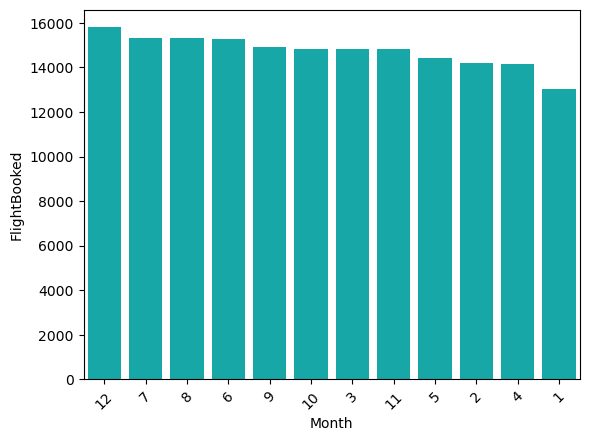

In [18]:
# Contar los valores y ordenarlos de mayor a menor: no lo ordena por mes, sino por el número de ocurrencias.
# Contar los valores de la columna 'Month' y ordenarlos de acuerdo a su frecuencia
meses = df_JOIN['Month'].value_counts().index

# Crear el gráfico de barras con los valores ordenados
sns.countplot(x='Month', data=df_JOIN, color = 'c', order=meses)

# Girar las etiquetas del eje X
plt.xticks(rotation=45)

# Cambiar los nombres de los ejes
plt.xlabel("Month")
plt.ylabel("FlightBooked")

 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

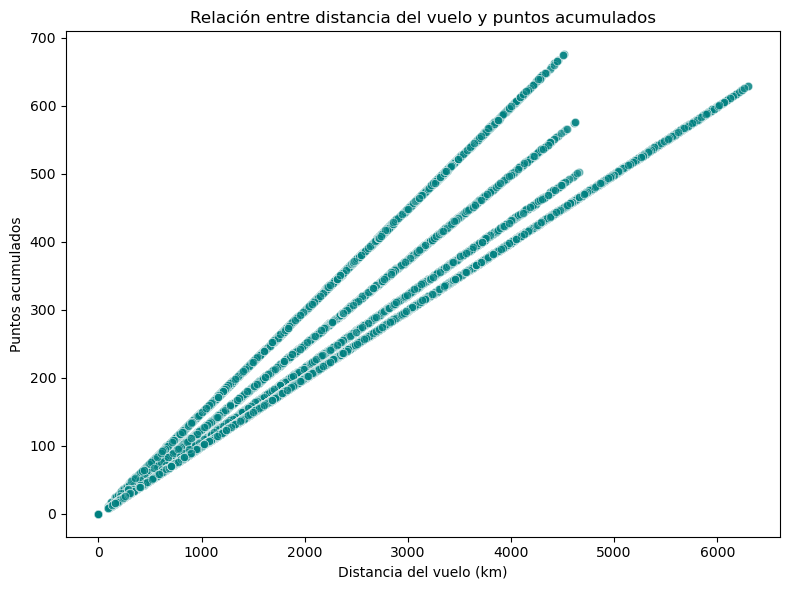

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Distance',    # Ajusta con el nombre real de la columna
    y='PointsAccumulated',  # Ajusta con el nombre real
    data=df_JOIN,
    alpha=0.6,
    color='teal'
)
plt.title('Relación entre distancia del vuelo y puntos acumulados')
plt.xlabel('Distancia del vuelo (km)')
plt.ylabel('Puntos acumulados')
plt.tight_layout()
plt.show()

 3. ¿Cuál es la distribución de los clientes por provincia o estado?

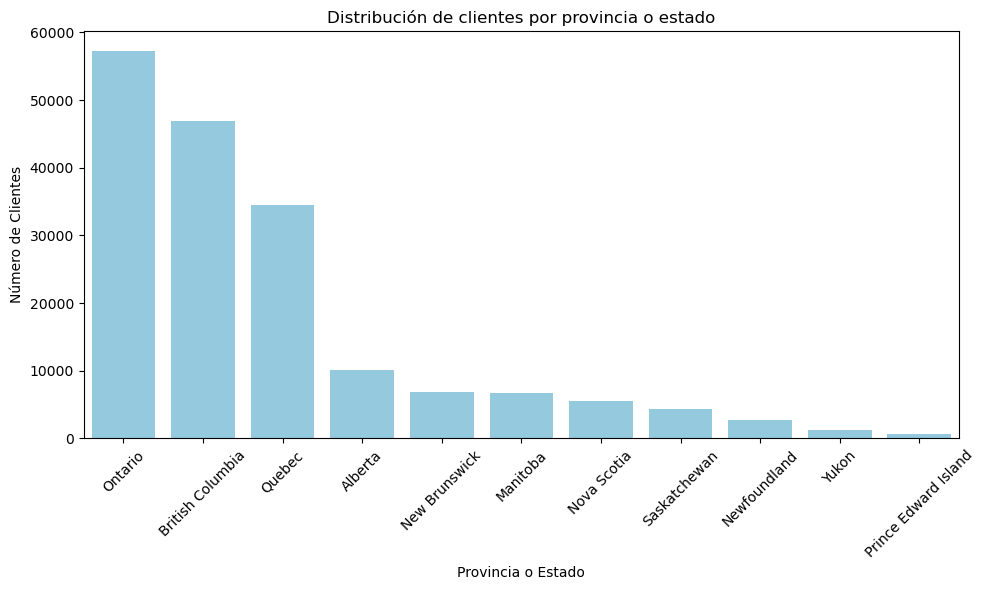

In [20]:
clientes_por_estado = df_JOIN['Province'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='Province', data=df_JOIN, order=df_JOIN['Province'].value_counts().index, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Provincia o Estado')
plt.ylabel('Número de Clientes')
plt.title('Distribución de clientes por provincia o estado')
plt.tight_layout()
plt.show()

 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [21]:
salario_promedio = df_JOIN.groupby("Education")["Salary"].mean().sort_values(ascending=False)
print(salario_promedio)


Education
Doctor                  178857.939936
Master                  103498.134807
College                  79245.609409
Bachelor                 72716.009222
High School or Below     60747.878446
Name: Salary, dtype: float64


/var/folders/cn/bkqs0ccn33387p8q231338c40000gn/T/ipykernel_918/1383309914.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Education", y="Salary", data=df_JOIN, estimator='mean', ci=None, palette="pastel")
/var/folders/cn/bkqs0ccn33387p8q231338c40000gn/T/ipykernel_918/1383309914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Education", y="Salary", data=df_JOIN, estimator='mean', ci=None, palette="pastel")


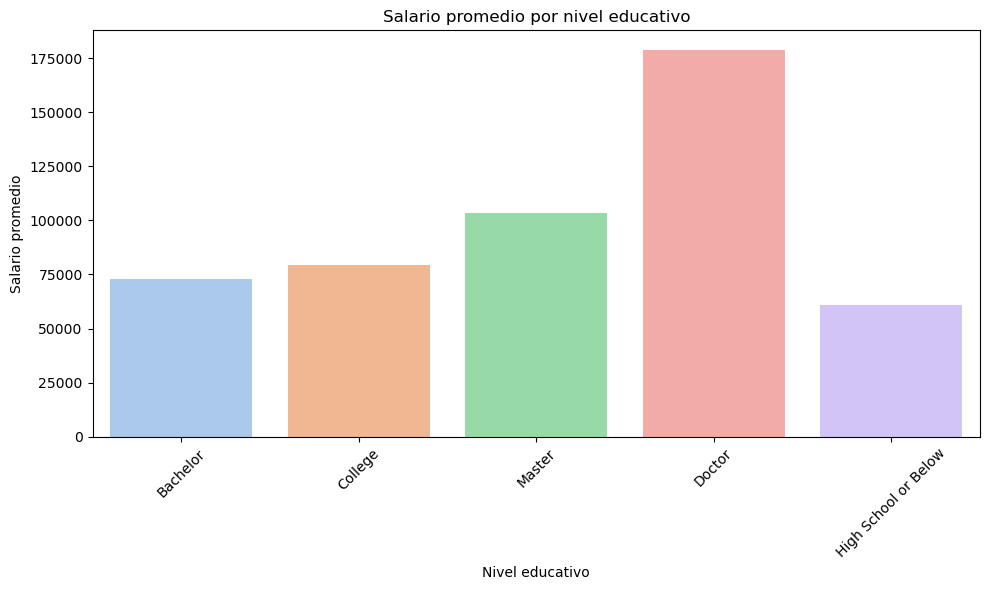

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Education", y="Salary", data=df_JOIN, estimator='mean', ci=None, palette="pastel")
plt.xticks(rotation=45)
plt.title("Salario promedio por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio")
plt.tight_layout()
plt.show()

 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [23]:
tarjetas_clientes = df_JOIN['LoyaltyCard'].value_counts(normalize=True)
print(tarjetas_clientes)

LoyaltyCard
Star      0.454604
Nova      0.337900
Aurora    0.207496
Name: proportion, dtype: float64


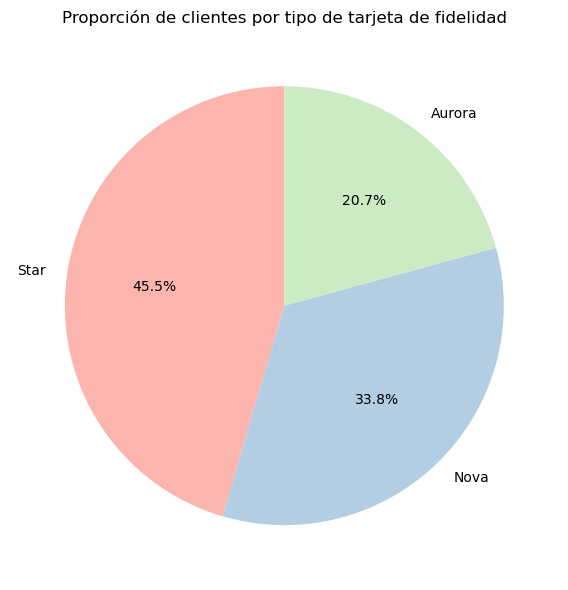

In [24]:
df_JOIN['LoyaltyCard'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors,
    figsize=(6,6),
    ylabel='',  # Oculta el label del eje Y
    title='Proporción de clientes por tipo de tarjeta de fidelidad'
)
plt.tight_layout()
plt.show()


 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

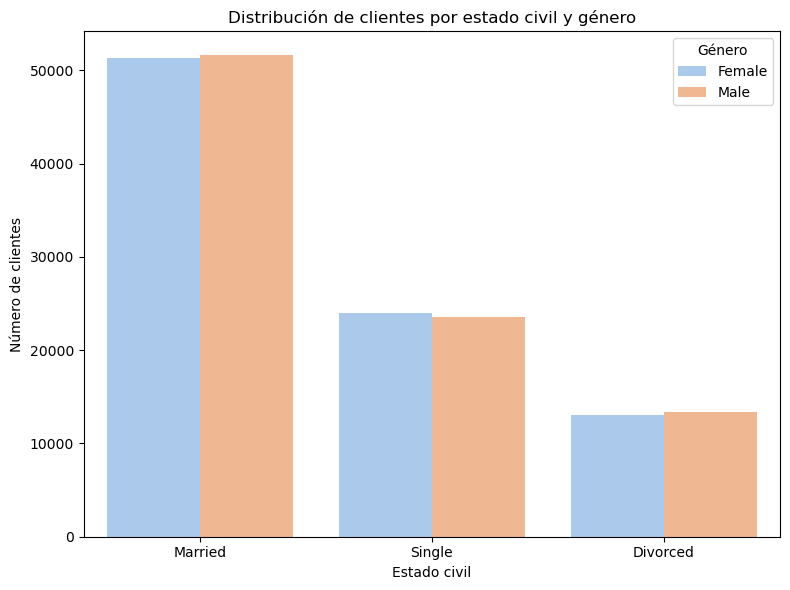

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x='MaritalStatus', hue='Gender', data=df_JOIN, palette='pastel')
plt.title('Distribución de clientes por estado civil y género')
plt.xlabel('Estado civil')
plt.ylabel('Número de clientes')
plt.legend(title='Género')
plt.tight_layout()
plt.show()

## 2-Visualizacion con los dos CSV limpios CFA y CLH (sin JOIN):

Cargamos los dos DF limpios de CFA y CLH para realizar las visualizaciones sin JOIN (y vemos que el resultado es el mismi)

In [144]:
df_CFA = pd.read_csv('CFA_limpio2.csv',index_col = 0, sep=',')

In [145]:
df_CFA

,Year,Month,FlightsBooked,FlightswithCompanions,TotalFlights,Distance,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152,0,0
100102,2017,1,10,4,14,2030,203,0,0
100140,2017,1,6,0,6,1200,120,0,0
100214,2017,1,0,0,0,0,0,0,0
100428,2017,1,6,0,6,606,60,0,0
...,...,...,...,...,...,...,...,...,...
999524,2018,12,11,4,15,1500,150,0,0
999550,2018,12,15,0,15,2985,298,0,0
999631,2018,12,11,1,12,2244,224,0,0


In [146]:
df_CFA.columns

Index(['Year', 'Month', 'FlightsBooked', 'FlightswithCompanions',
       'TotalFlights', 'Distance', 'PointsAccumulated', 'PointsRedeemed',
       'DollarCostPointsRedeemed'],
      dtype='object')

 -1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

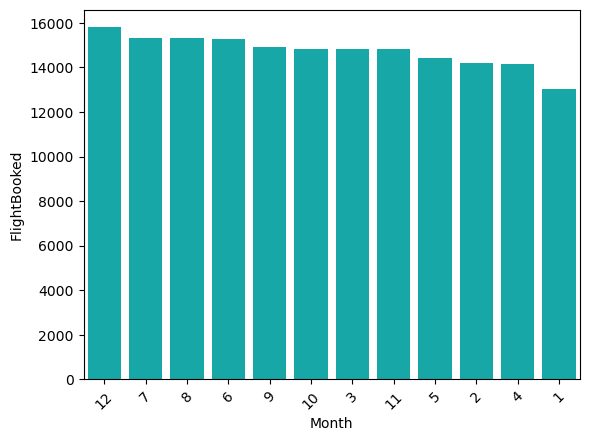

In [147]:
# Contar los valores y ordenarlos de mayor a menor: no lo ordena por mes, sino por el número de ocurrencias.
# Contar los valores de la columna 'Month' y ordenarlos de acuerdo a su frecuencia
meses = df_CFA['Month'].value_counts().index

# Crear el gráfico de barras con los valores ordenados
sns.countplot(x='Month', data=df_CFA, color = 'c', order=meses)

# Girar las etiquetas del eje X
plt.xticks(rotation=45)

# Cambiar los nombres de los ejes
plt.xlabel("Month")
plt.ylabel("FlightBooked")

# Mostrar la gráfica
plt.show()

 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [150]:
print(df_CFA.columns)


Index(['Year', 'Month', 'FlightsBooked', 'FlightswithCompanions',
       'TotalFlights', 'Distance', 'PointsAccumulated', 'PointsRedeemed',
       'DollarCostPointsRedeemed'],
      dtype='object')


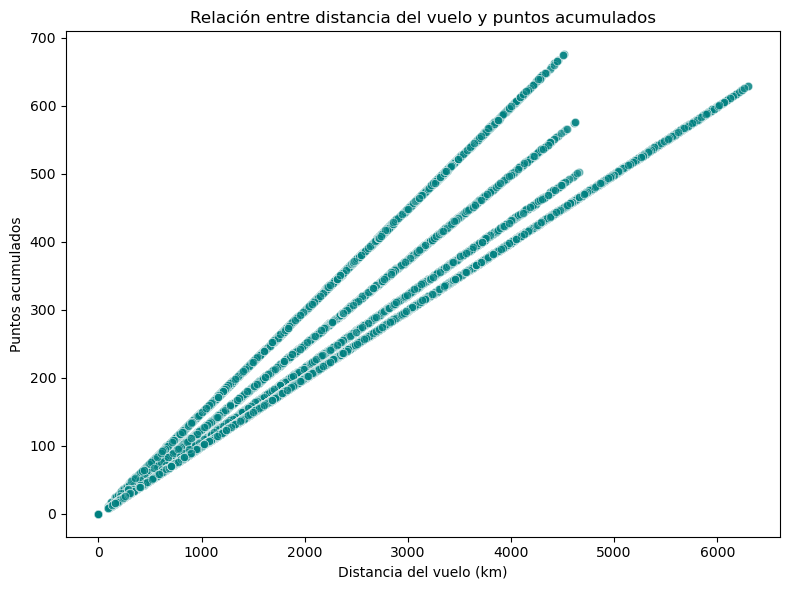

In [151]:


plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Distance',    # Ajusta con el nombre real de la columna
    y='PointsAccumulated',  # Ajusta con el nombre real
    data=df_CFA,
    alpha=0.6,
    color='teal'
)
plt.title('Relación entre distancia del vuelo y puntos acumulados')
plt.xlabel('Distancia del vuelo (km)')
plt.ylabel('Puntos acumulados')
plt.tight_layout()
plt.show()


 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [174]:
df_CLH2= pd.read_csv('CLH_limpio2.csv',index_col = 0, sep=',')

In [175]:
print(df_CLH2.columns)


Index(['Country', 'Province', 'City', 'PostalCode', 'Gender', 'Education',
       'MaritalStatus', 'LoyaltyCard', 'CLV', 'EnrollmentType',
       'EnrollmentYear', 'EnrollmentMonth', 'Salary'],
      dtype='object')


In [176]:
df_CLH2

,Country,Province,City,PostalCode,Gender,Education,MaritalStatus,LoyaltyCard,CLV,EnrollmentType,EnrollmentYear,EnrollmentMonth,Salary
Loyalty Number,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,3839.14,Standard,2016,2,83236.000000
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,Divorced,Star,3839.61,Standard,2016,3,79245.609409
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,Single,Star,3839.75,Standard,2014,7,79245.609409
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,Single,Star,3839.75,Standard,2013,2,79245.609409
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,Married,Star,3842.79,Standard,2014,10,103495.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,Married,Star,61850.19,Standard,2012,12,79245.609409
680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,Married,Star,67907.27,Standard,2014,9,89210.000000
776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,Single,Star,74228.52,Standard,2014,3,79245.609409


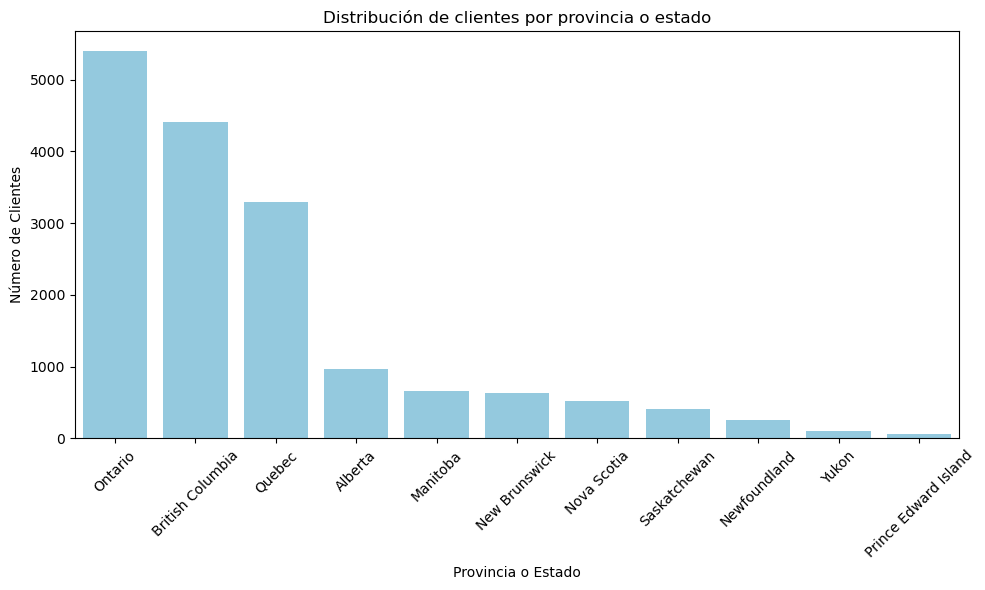

In [177]:
clientes_por_estado = df_CLH2['Province'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='Province', data=df_CLH2, order=df_CLH2['Province'].value_counts().index, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Provincia o Estado')
plt.ylabel('Número de Clientes')
plt.title('Distribución de clientes por provincia o estado')
plt.tight_layout()
plt.show()


 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [178]:
salario_promedio = df_CLH2.groupby("Education")["Salary"].mean().sort_values(ascending=False)
print(salario_promedio)


Education
Doctor                  178608.897820
Master                  103757.848425
College                  79245.609409
Bachelor                 72451.061575
High School or Below     61071.718670
Name: Salary, dtype: float64


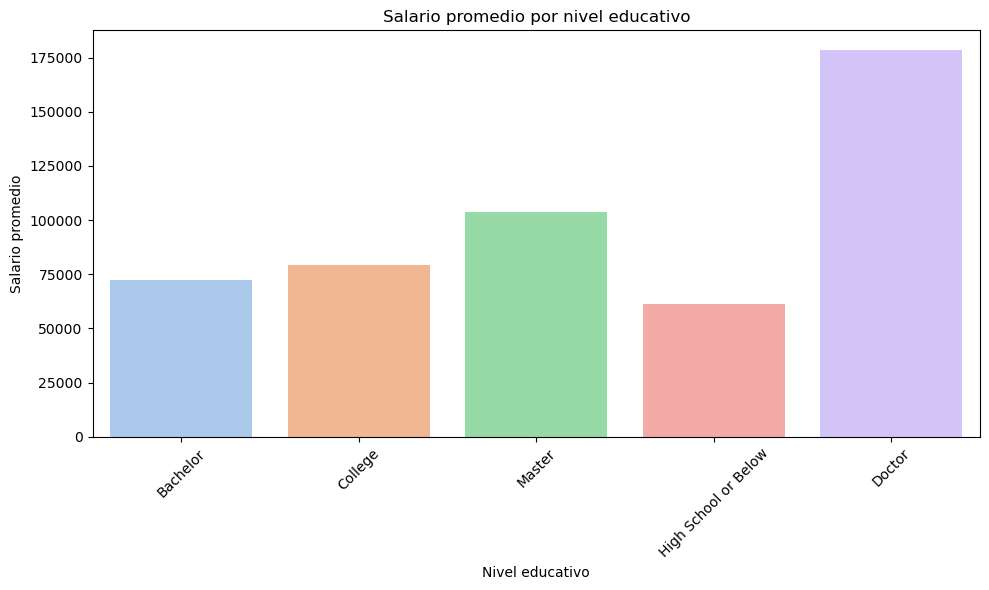

In [179]:


plt.figure(figsize=(10, 6))
sns.barplot(x="Education", y="Salary", data=df_CLH2, estimator='mean', ci=None, palette="pastel")
plt.xticks(rotation=45)
plt.title("Salario promedio por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio")
plt.tight_layout()
plt.show()


 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [180]:
tarjetas_clientes = df_CLH2['LoyaltyCard'].value_counts(normalize=True)
print(tarjetas_clientes)


LoyaltyCard
Star      0.456294
Nova      0.338830
Aurora    0.204875
Name: proportion, dtype: float64


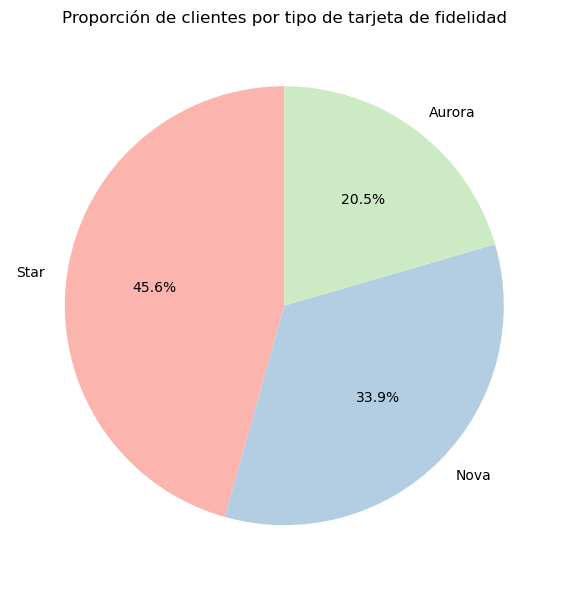

In [181]:


df_CLH2['LoyaltyCard'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors,
    figsize=(6,6),
    ylabel='',  # Oculta el label del eje Y
    title='Proporción de clientes por tipo de tarjeta de fidelidad'
)
plt.tight_layout()
plt.show()


 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

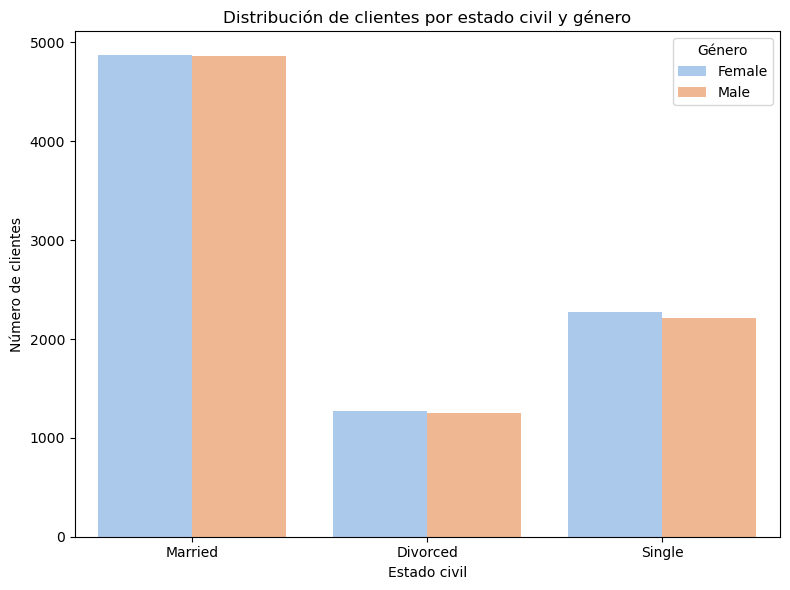

In [182]:


plt.figure(figsize=(8,6))
sns.countplot(x='MaritalStatus', hue='Gender', data=df_CLH2, palette='pastel')
plt.title('Distribución de clientes por estado civil y género')
plt.xlabel('Estado civil')
plt.ylabel('Número de clientes')
plt.legend(title='Género')
plt.tight_layout()
plt.show()
